<a href="https://colab.research.google.com/github/pauaaco/PROYECTOS/blob/main/Proyecto_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PASO A PASO**

*Maria Paula Acosta Gutierrez-67000777*

1.Se procedio a importar el CSV del dataset Wine por lo
que se importo desde drive,el archivo se encontraba en mi unidad de drive.

2.Se agrega la biblioteca files de google colab asi como tambien la biblioteca drive.

3.Despues a una variable llamada data le asignaremos la lectura del archivo csv por medio de pandas ademas de que damos a pandas la ruta de donde se encuentra nuestro archivo CSV.

4.Lamamos la variable data para corroborar la lectura correcta del dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab import files
from google.colab import drive
drive.mount("/content/drive")
data= pd.read_csv("/content/drive/MyDrive/wine.csv")
data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


CAMBIO TIPO DE VARIABLE

1. De acuerdo al data set la Varible Wine se refiere a una categorizacion de vino tipo 1,2 o 3 por lo que se procede a cambiar esta variable de tipo Int a object o string.
2. Para el cambio de tipo  de variable llamamos a "data" nuestro dataset lo situamos en Wine la variable que deseamos cambiar de Int a String, y a este le asignaremos .astype(str) que nos ayuda a convetri todos los valores de una columna a cadenas de texto.
3. Se llama a la propiedad .dtypes para evidenciar si el cambio fue exitoso

In [ ]:
data.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [ ]:
data['Wine']= data['Wine'].astype(str)

In [ ]:
data.dtypes

Wine                     object
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

**DESCRIPCIÓN** **ESTADISTICA** **DE** **DATOS**

Se procede a usar la función.describe con el porposito que logre determinar algunos datos estaditicos de gran importancia con respecto al data set.

1. Count: Nos cuenta la cantidad de datos presentes en cada columna.
2. Mean: El promedio de cada variable.
3. std:Es la desviación estandar, que nos indica que cada valor de la columna puede aumentar o disminuir en dicho valor.
4. Min: El valor minimo presente en cada columna.
5. Max:El valor maximo o mas grande presente en cada columna.
6. 25%,50%, 75%: Los cuartiles (los percentiles 25, 50 y 75) dividen las observaciones en cuatro grupos de igual tamaño.

In [ ]:
data.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**CORRELACIONES**

1.   En un primer momento se asigno a la variable wine el data.loc[data.wine=="1"] en este caso el .loc es un metodo que nos permite acceder a los datos del dataset y permite seleccionar filas y columnas, data.wine=="1" filtra las filas donde el valor de la columna Wine es 1
2.   Seguido de esto a la variable corr_mat_wine le asignamos wine.corr().round(2), en este caso el metodo .cor() calcula la correlacion entre las columnas y filas que filtaramos previamenta ademas de que .round(2) nos permite dejar unicamente 2 decimales en la correlacion para facilitar su visualizacion.
3. El plt.figure activa una figura existente en matplotlib de modo que los argumentos de figsize=(10,8)establecen las dimensiones de la figura en este caso el mapa de calor.
4. A la variable plor se le asigna la sns.heatmap() esta es una funcion que crea en para de calor ademas de que de damos como argumento las coreelaciones de la varible wine y dejamos visibles unicamente 2 deciamles ademas de que los valores de las correlaciones sean visibles en el mapa de calor.
5. Por ultimo establecemos un titulo a la figura.



<ipython-input-304-b6f40fe64979>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_wine=wine.corr().round(2)
<ipython-input-304-b6f40fe64979>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot=sns.heatmap(wine.corr().round(2),annot=True)


Text(0.5, 1.0, 'VINO TIPO 1')

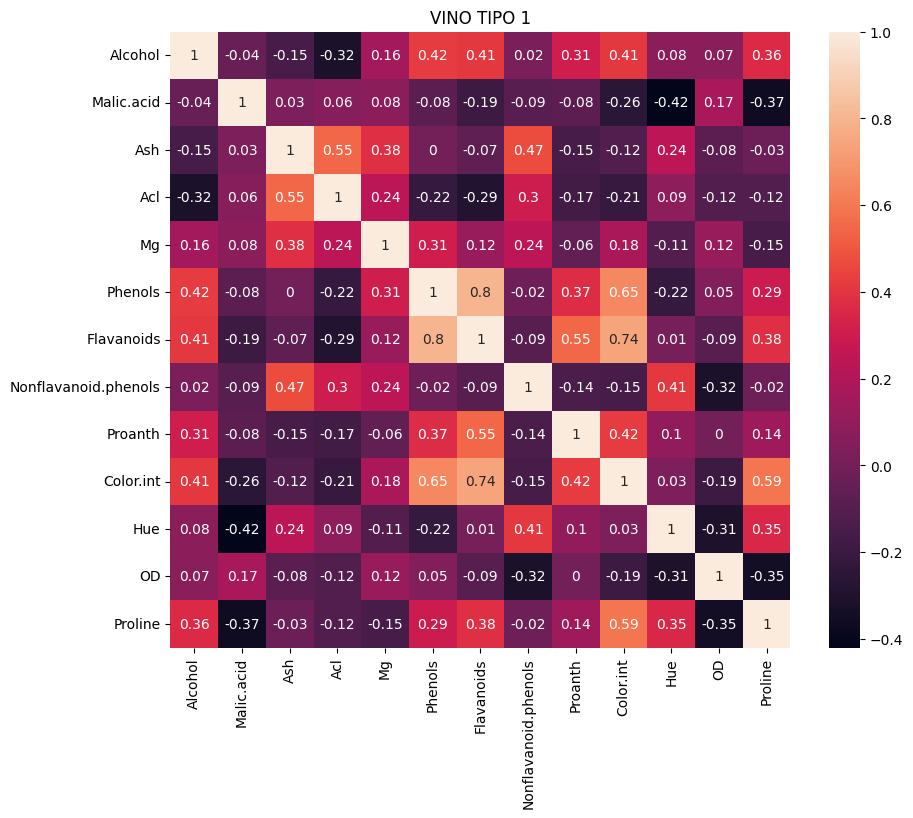

In [ ]:
wine= data.loc[data.Wine=="1"]
corr_mat_wine=wine.corr().round(2)
plt.figure(figsize=(10,8))
plot=sns.heatmap(wine.corr().round(2),annot=True)
plot.set_title("VINO TIPO 1")

<ipython-input-289-cd9174ded831>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_wine2=wine2.corr().round(2)
<ipython-input-289-cd9174ded831>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot=sns.heatmap(wine2.corr().round(2),annot=True)


Text(0.5, 1.0, 'VINO TIPO 2')

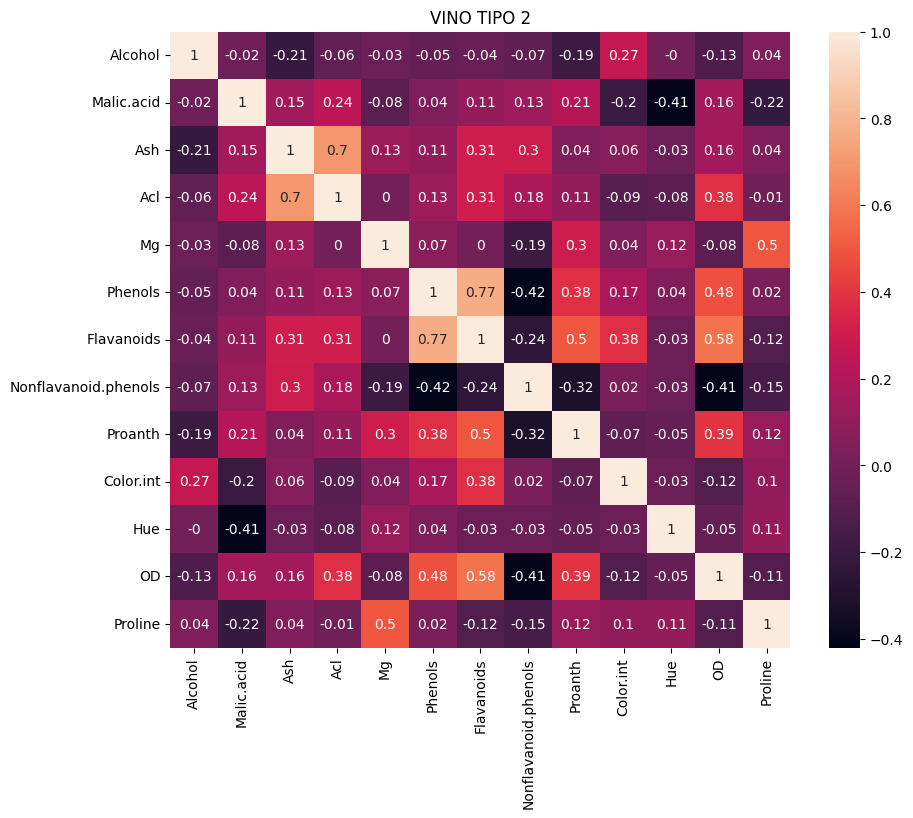

In [ ]:
wine2= data.loc[data.Wine=="2"]
corr_mat_wine2=wine2.corr().round(2)
corr_mat_wine2
plt.figure(figsize=(10,8))
plot=sns.heatmap(wine2.corr().round(2),annot=True)
plot.set_title("VINO TIPO 2")

<ipython-input-291-fbbea48a5bfc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_wine3=wine3.corr().round(2)
<ipython-input-291-fbbea48a5bfc>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot=sns.heatmap(wine3.corr().round(2),annot=True)


Text(0.5, 1.0, 'VINO TIPO 3')

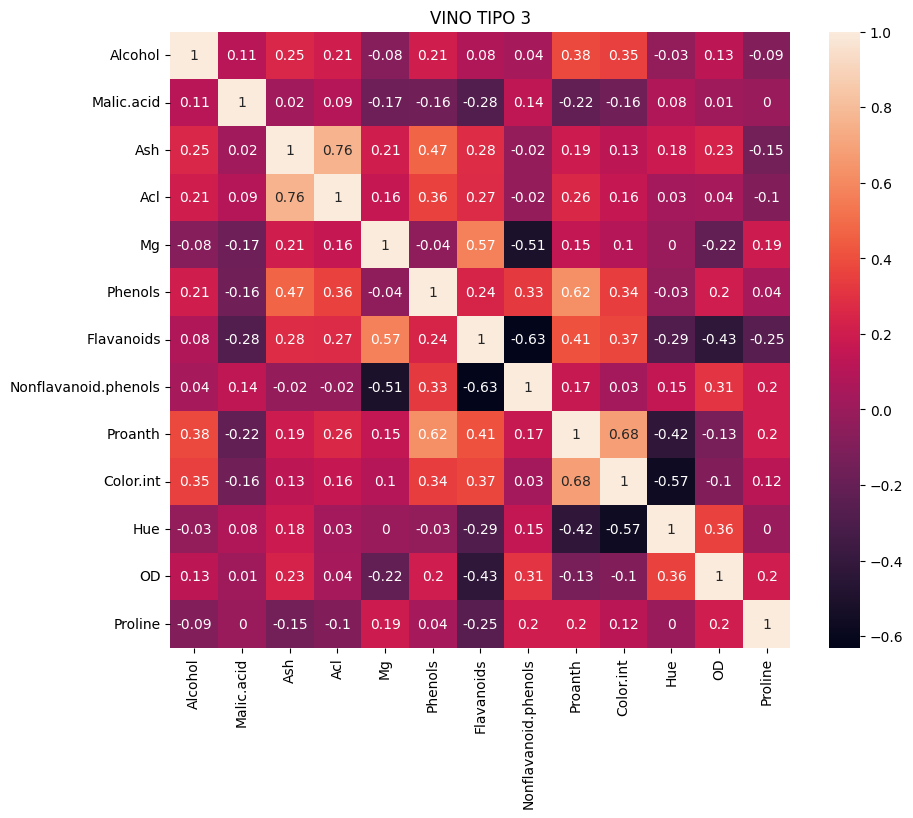

In [ ]:
wine3= data.loc[data.Wine=="3"]
corr_mat_wine3=wine3.corr().round(2)
corr_mat_wine3
plt.figure(figsize=(10,8))
plot=sns.heatmap(wine3.corr().round(2),annot=True)
plot.set_title("VINO TIPO 3")

<ipython-input-17-4c6cea79b32e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr().round(2)


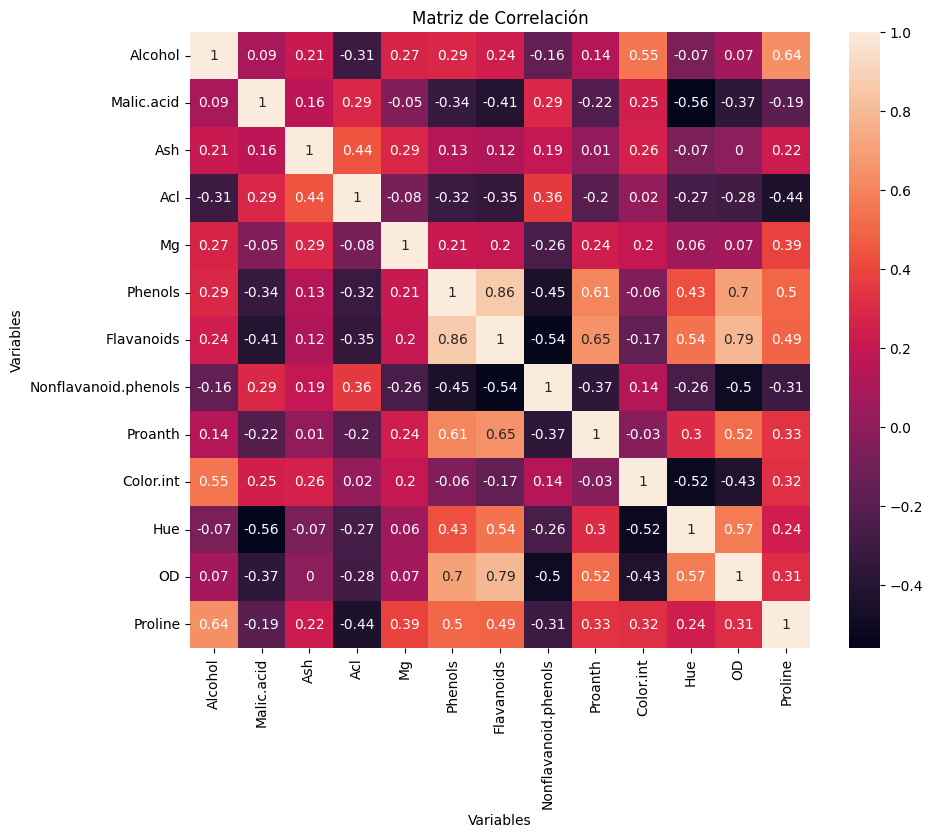

In [ ]:
corr_matrix=data.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)

plt.xlabel("Variables")
plt.ylabel("Variables")
plt.title("Matriz de Correlación")

plt.show()


**VARIABLES**

En relación a las el mapa de calor que muestra la correlaciones entre variables se comenzaron a evlauar varias de estas, ademas de que se busco que tuviesen mayor correlación y que las metricas del modelo fuesen acertadas en lo posible.

Se procedio a graficar estas 5 variables con ayuda de la funcion sns.pairplot() donde se le asignaron las variables a visualizar, el dataset y la variable categorica que seria wine.

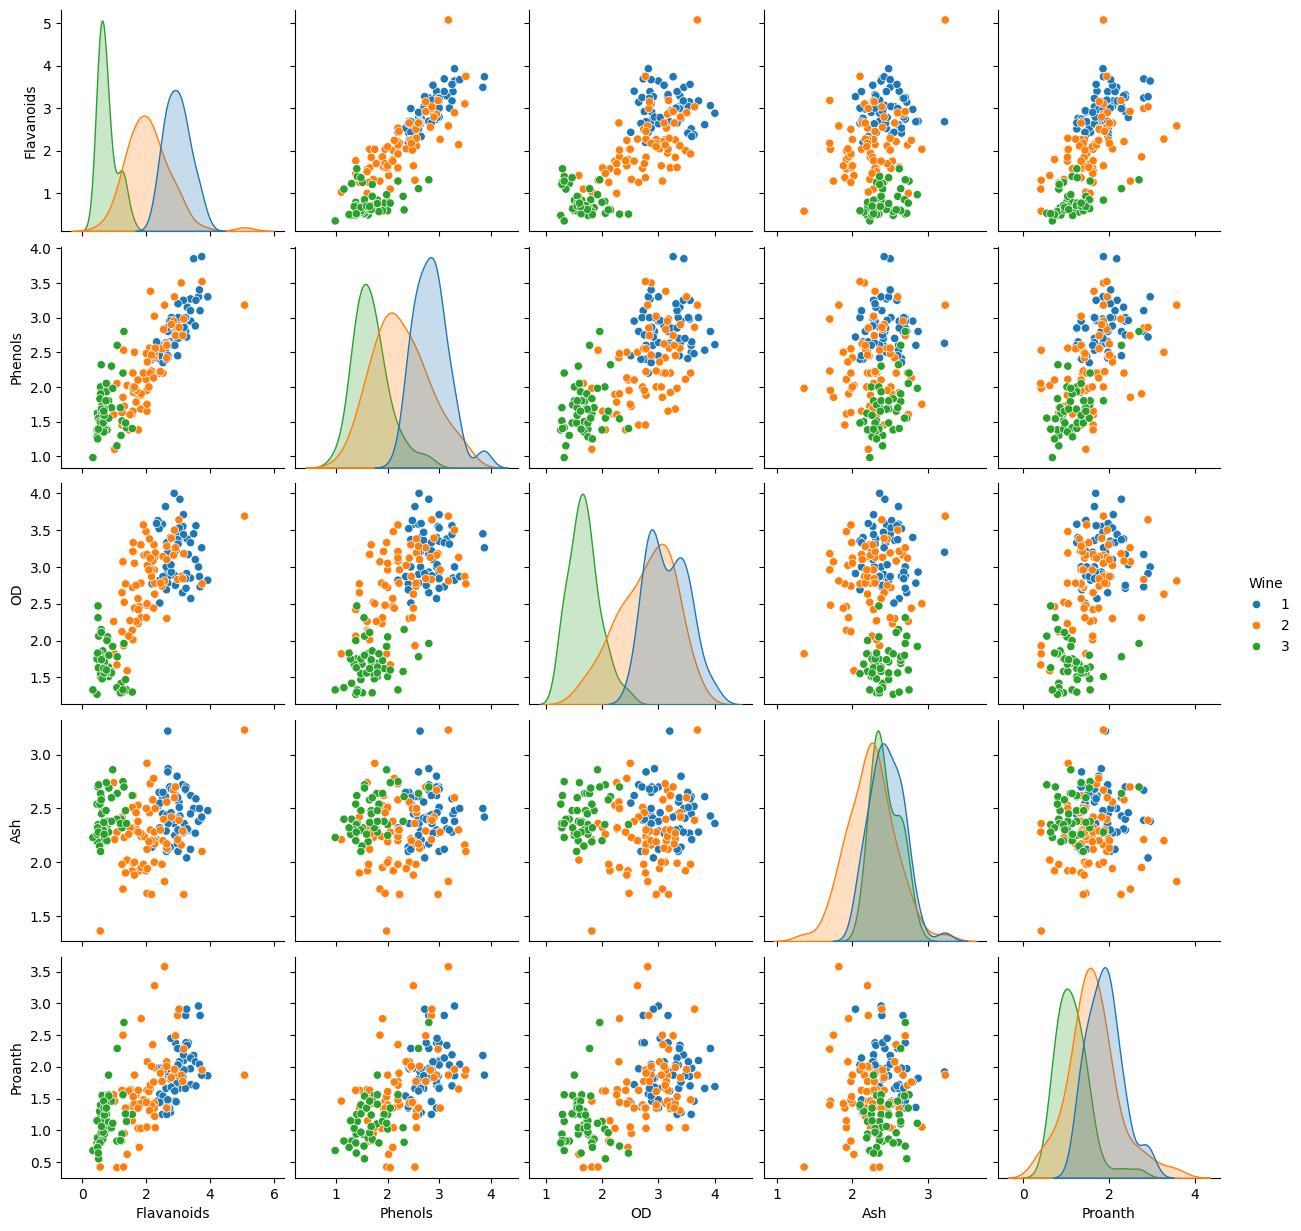

In [ ]:
sns.pairplot(data, vars=["Flavanoids","Phenols","OD","Ash","Proanth"],hue="Wine")

**NAIVE BAYES **

Para el modelo de Naive bayes previamente se importo la clase GaussianNb desde el modulo Naive_bayes de sklearn ademas se importo la funcion train_test_split que esta nos permite dividir los datos en conjunto de entrenamiento y prueba y por ultimo se importo la funcion de classification report desde metrics  que nos da un resumen de las metricas para el modelo.


1. En primer lugar determinamos nuestra variables X Y y donde las primeras seran las dependientes y la segunda sera la independiente, Estas variables se eligieron debido a su correlación que se evidencia  tanto en el grafico de mapa de calor como en la grafica de matriz de dispersión.



In [ ]:
X=data[['Phenols','Flavanoids','Proanth','OD','Ash']]
y=data['Wine']
data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**PARTICIÓN**

* En esta linea de codigo se dividen los datos en conjutnos de entrenamiento (X_tarin,y_tarin) y prueba (X_test,y_test) de manera que el test_size=.3 indica que el 30% de los datos se utilizaran como conjunto de prueba, mientras que el 70% restante sera para entrenamiento.

* El random_state=0, Establece una semilla para la generacion de numero aleatorios lo que grantiza quela division sea reproducible.



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)


* se procede a crear una variable cld que representa an clasificador de naive bayes  y gaussianNB() es la clase que implementa el algortimo.

* El metodo .fit() entrena en clasificador don los datos de entrenamiento.

In [ ]:
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

**METRICAS**

En este caso usamos en modelo entrenado clf para hacer predicciones de en los datos de prueba X_test.

Classification_report(y_test,y_pred) nos proporcionara un resumen de las metricas del modelo.


In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.95      0.80        19
           2       0.86      0.55      0.67        22
           3       0.86      0.92      0.89        13

    accuracy                           0.78        54
   macro avg       0.80      0.81      0.79        54
weighted avg       0.80      0.78      0.77        54



**CONCLUSIONES**
* De acuerdo a las metricas podemos denotar que para el vino tipo 1,2y 3 las predicciones positivas correctas en relacion a todad las prediccciones positvas del modelo son de un 69%,86% y 86%.

* La capacidad del modelo para encontrar todas las instancias positivas reales para cada vino fue de 95%,55% y 92%.

* Por ultimo la medida armonica de precision y recall para cada vino fue de,80%,67% y 89%

*La precisión general del modelo es del 78%. Esto significa que aproximadamente el 78% de las predicciones realizadas por el modelo son correctas.

En general, estas métricas indican que el modelo tiene un buen rendimiento en la clase 1 y 3 pero puede mejorar en la clase 2.


